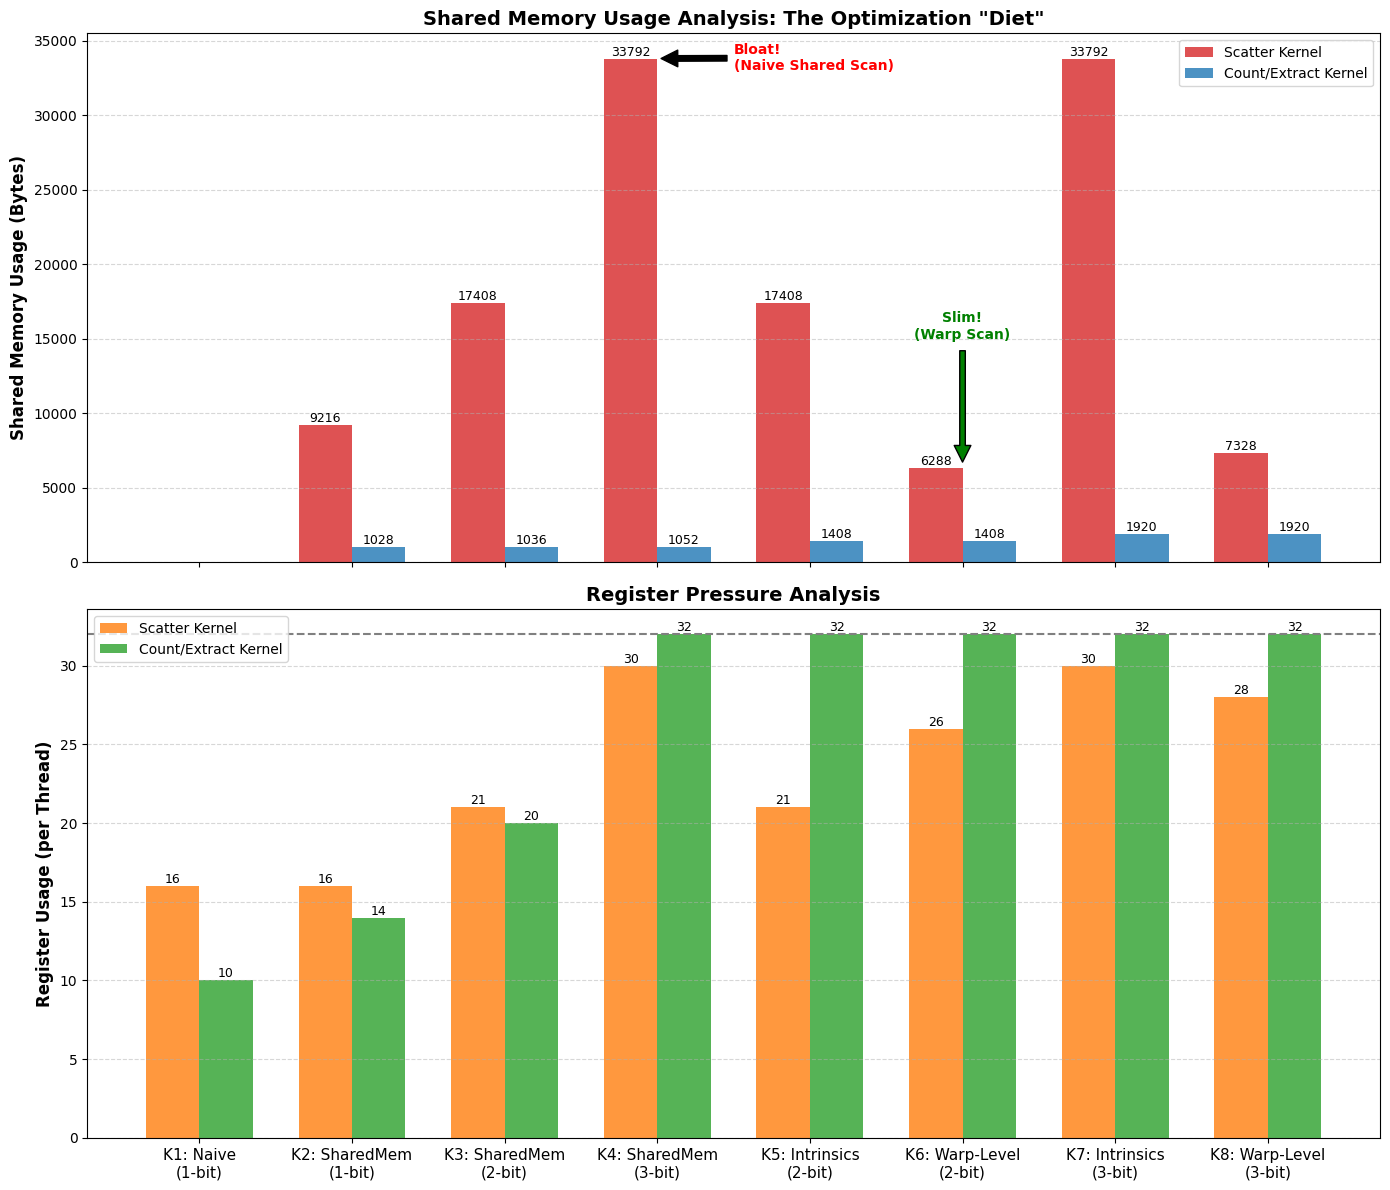

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data Extraction
data = {
    'Kernel': ['K1: Naive\n(1-bit)', 'K2: SharedMem\n(1-bit)', 'K3: SharedMem\n(2-bit)', 'K4: SharedMem\n(3-bit)', 
               'K5: Intrinsics\n(2-bit)', 'K6: Warp-Level\n(2-bit)', 'K7: Intrinsics\n(3-bit)', 'K8: Warp-Level\n(3-bit)'],
    # Scatter Kernel Stats
    'Scatter_Regs': [16, 16, 21, 30, 21, 26, 30, 28],
    'Scatter_Shared': [0, 9216, 17408, 33792, 17408, 6288, 33792, 7328],
    # Count/Extract Kernel Stats
    'Count_Regs': [10, 14, 20, 32, 32, 32, 32, 32], # K1 is Extract
    'Count_Shared': [0, 1028, 1036, 1052, 1408, 1408, 1920, 1920]
}

df = pd.DataFrame(data)

# Visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# Plot 1: Shared Memory Usage
bar_width = 0.35
x = np.arange(len(df['Kernel']))

bars1 = ax1.bar(x - bar_width/2, df['Scatter_Shared'], bar_width, label='Scatter Kernel', color='#d62728', alpha=0.8) # Red for heavy
bars2 = ax1.bar(x + bar_width/2, df['Count_Shared'], bar_width, label='Count/Extract Kernel', color='#1f77b4', alpha=0.8) # Blue for light

ax1.set_ylabel('Shared Memory Usage (Bytes)', fontsize=12, fontweight='bold')
ax1.set_title('Shared Memory Usage Analysis: The Optimization "Diet"', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# Annotate values for Shared Mem
for bar in bars1:
    height = bar.get_height()
    if height > 0:
        ax1.text(bar.get_x() + bar.get_width()/2., height, f'{int(height)}', ha='center', va='bottom', fontsize=9)
for bar in bars2:
    height = bar.get_height()
    if height > 0:
        ax1.text(bar.get_x() + bar.get_width()/2., height, f'{int(height)}', ha='center', va='bottom', fontsize=9)

# Highlight the drop
ax1.annotate('Bloat!\n(Naive Shared Scan)', xy=(3, 33792), xytext=(3.5, 33000), 
             arrowprops=dict(facecolor='black', shrink=0.05), ha='left', color='red', fontsize=10, fontweight='bold')
ax1.annotate('Slim!\n(Warp Scan)', xy=(5, 6288), xytext=(5, 15000), 
             arrowprops=dict(facecolor='green', shrink=0.05), ha='center', color='green', fontsize=10, fontweight='bold')


# Plot 2: Register Usage
bars3 = ax2.bar(x - bar_width/2, df['Scatter_Regs'], bar_width, label='Scatter Kernel', color='#ff7f0e', alpha=0.8) # Orange
bars4 = ax2.bar(x + bar_width/2, df['Count_Regs'], bar_width, label='Count/Extract Kernel', color='#2ca02c', alpha=0.8) # Green

ax2.set_ylabel('Register Usage (per Thread)', fontsize=12, fontweight='bold')
ax2.set_title('Register Pressure Analysis', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(df['Kernel'], fontsize=11)
ax2.legend(loc='upper left')
ax2.grid(axis='y', linestyle='--', alpha=0.5)

# Annotate values for Regs
for bar in bars3:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height, f'{int(height)}', ha='center', va='bottom', fontsize=9)
for bar in bars4:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height, f'{int(height)}', ha='center', va='bottom', fontsize=9)

# Reference Line for 32 registers (Magic Number for Occupancy)
ax2.axhline(y=32, color='gray', linestyle='--', label='Limit: 32 Regs/Thread (for 100% Occupancy on some archs)')

plt.tight_layout()
plt.savefig('resource_usage_analysis.png', dpi=150)
plt.show()